In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## dataset available from the below source

_CITATION = """\
@inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",
    month = oct # "-" # nov,
    year = "2018",
    address = "Brussels, Belgium",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/D18-1404",
    doi = "10.18653/v1/D18-1404",
    pages = "3687--3697"
}
"""


In [22]:
# we will only use the emotions that we also have in our own dataset, fear, anger, joy, sadness.

import pickle

with open('merged_training.pkl', 'rb') as f:
    data = pickle.load(f)

In [23]:
# remoce love and suprise from the dataset
data = data.loc[(data.emotions!='surprise') & (data.emotions!='love')]

label2int = {
  "sadness": 1,
  "joy": 2,
  "anger": 3,
  "fear": 4,
}

<AxesSubplot:>

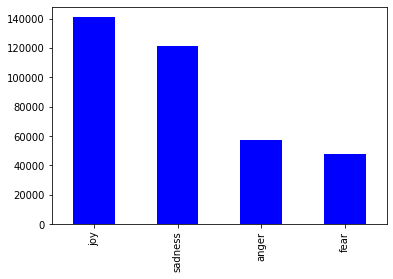

In [24]:
#checking the label distribution reveals the dataset is unbalanced
data.emotions.value_counts().plot.bar(color = 'b')

In [25]:
# Perform downsample to match minority class fear
df_minority  = data[data['emotions']=='fear']
df_majority1 = data[data['emotions']=='joy']
df_majority2 = data[data['emotions']=='sadness']
df_majority3 = data[data['emotions']=='anger']

#downsample majority labels equal to the number of samples in the minority class
df_majority1 = df_majority1.sample(len(df_minority), random_state=0)
df_majority2 = df_majority2.sample(len(df_minority), random_state=0)
df_majority3 = df_majority3.sample(len(df_minority), random_state=0)

#concat the majority and minority dataframes
df_new = pd.concat([df_majority1, df_majority2, df_majority3, df_minority])

#shuffle the dataset
df_new = df_new.sample(frac=1, random_state=0)

<AxesSubplot:>

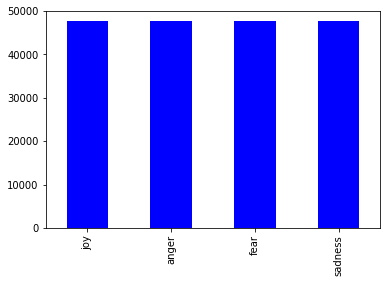

In [26]:
#check the distribution again to see if its balance
df_new.emotions.value_counts().plot.bar(color = 'b')

In [28]:
#get subsample of 25k samples for fine tuning
data = df_new.sample(n=25000);

#reset index
data.reset_index(drop=True, inplace=True)
len(data)

25000

In [29]:
#Generate the text files for train, val, and test datasets in proportion 80:10:10
from sklearn.model_selection import train_test_split
import numpy as np
train_path = "emotion_data/train.txt"
test_path = "emotion_data/test.txt"
val_path = "emotion_data/val.txt"

#Create training and validation sets using an 80-20 split
input_train, input_val, target_train, target_val = train_test_split(data.text.to_numpy(), 
                                                                    data.emotions.to_numpy(), 
                                                                    test_size=0.2)

# Split the validataion further to obtain a holdout dataset (for testing) -- split 1:1
input_val, input_test, target_val, target_test = train_test_split(input_val, target_val, test_size=0.5)


## create a dataframe for each dataset
train_dataset = pd.DataFrame(data={"text": input_train, "class": target_train})
val_dataset = pd.DataFrame(data={"text": input_val, "class": target_val})
test_dataset = pd.DataFrame(data={"text": input_test, "class": target_test})
final_dataset = {"train": train_dataset, "val": val_dataset , "test": test_dataset }

train_dataset.to_csv(train_path, sep=";",header=False, index=False)
val_dataset.to_csv(val_path, sep=";",header=False, index=False)
test_dataset.to_csv(test_path, sep=";",header=False, index=False)

In [30]:
len(test_dataset)

2500